<a href="https://colab.research.google.com/github/asu-trans-ai-lab/grid2demand/blob/main/grid2demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: load the OSM file from the repository of OSM testing datasets**

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 307 (delta 11), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (307/307), 151.15 MiB | 14.74 MiB/s, done.
Resolving deltas: 100% (100/100), done.
Updating files: 100% (80/80), done.
/content/osm_test_data_set


Check the file icon on the left hand side, makesure file map.osm exists.

**Step 1: install python packages**

In [2]:
!pip install osm2gmns
!pip install grid2demand


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Step 2: convert OSM to GMNS Files**

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: all
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links


/usr/local/lib/python3.8/dist-packages/osm2gmns/utils/util_geo.py:113: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.startswith('Multi'):
/usr/local/lib/python3.8/dist-packages/osm2gmns/utils/util_geo.py:117: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type == 'Point':


  number of nodes: 823, number of links: 1614, number of pois: 0
No POIs found in the network. Please set POIs=True when creating network from osm file
Generating Node Activity Information
Consolidating Complex Intersections
    0 intersections have been consolidated
Outputting Network Files
Outputting Network Files


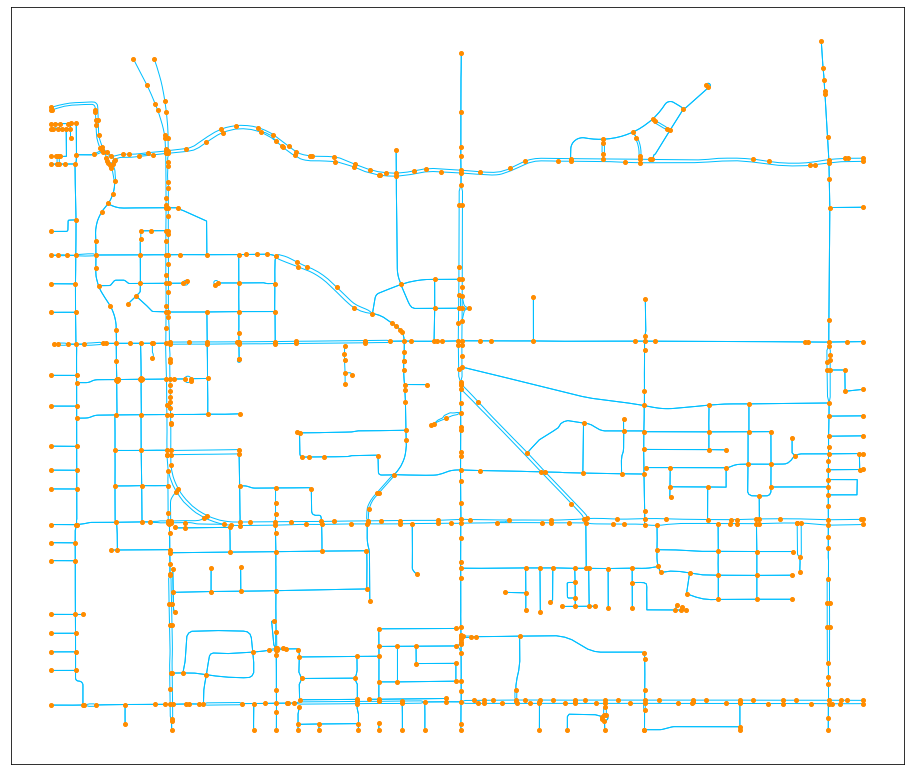

Figure is saved to network.jpg


In [5]:
import osm2gmns as og
net = og.getNetFromFile('map.osm')
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

Check node.csv, link.csv and poi.csv exist in the left-hand-side Colab folder.

**Step 3: Run grid2demand to generate demand based POI rates**

In [6]:
import grid2demand as gd
"Step 1: Read Input Network Data"
net = gd.ReadNetworkFiles('')

"Step 2: Partition Grid into cells"
zone = gd.PartitionGrid(number_of_x_blocks=5, number_of_y_blocks=5)
# user can customize number of grid cells or cell's width and height

"Step 3: Get Production/Attraction Rates of Each Land Use Type with a Specific Trip Purpose"
triprate = gd.GetPoiTripRate(trip_rate_folder='',trip_purpose=1)
# user can customize poi_trip_rate.csv and trip purpose

"Step 4: Define Production/Attraction Value of Each Node According to POI Type"
nodedemand = gd.GetNodeDemand()

"Step 5: Calculate Zone-to-zone Accessibility Matrix by Centroid-to-centroid Straight Distance"
accessibility = gd.ProduceAccessMatrix(latitude=30, accessibility_folder='')
# user can customize the latitude of the research area and accessibility.csv

"Step 6: Apply Gravity Model to Conduct Trip Distribution"
demand = gd.RunGravityModel(trip_purpose=1, a=None, b=None, c=None)
# user can customize friction factor coefficients under a specific trip purpose
"Step 7: Generate Agent"
demand = gd.GenerateAgentBasedDemand()

INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundar

grid2demand, version 0.2.7


INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundary is not defined in node.csv. Default value is 0.
INFO:root:is_boundar


Latitude used for grid partition =  30

Number of zones = 25


INFO:root:Latitude used for calculating accessibility = 30
INFO:root:Number of OD pairs = 625
INFO:root:Largest accessibility of distance = 4.03 km
INFO:root:Average accessibility of distance = 1.79 km
INFO:root:Default values of friction factor coefficients under trip purpose 1: 
a=28507
b=-0.02
c=-0.123
INFO:root:Top 1 O/D pair: zone 24->zone 22, volume = 1339
INFO:root:Top 2 O/D pair: zone 24->zone 21, volume = 1308
INFO:root:Top 3 O/D pair: zone 21->zone 24, volume = 1286
INFO:root:Top 4 O/D pair: zone 24->zone 23, volume = 1284
INFO:root:Top 5 O/D pair: zone 22->zone 24, volume = 1251
INFO:root:Top 6 O/D pair: zone 1->zone 24, volume = 1225
INFO:root:Top 7 O/D pair: zone 23->zone 24, volume = 1183
INFO:root:Top 8 O/D pair: zone 24->zone 16, volume = 1175
INFO:root:Top 9 O/D pair: zone 24->zone 1, volume = 1169
INFO:root:Top 10 O/D pair: zone 21->zone 16, volume = 1144
INFO:root:Zone-to-zone OD pair with largest volume is from E4 to E2
INFO:root:Origin zone with largest production 


Latitude used for calculating accessibility =  30

Number of OD pairs =  625

Largest accessibility of distance = 4.03 km
Average accessibility of distance = 1.79 km

Default values of friction factor coefficients under trip purpose 1: 
a= 28507 
b= -0.02 
c= -0.123

Top 10 O/D Volume:
Top 1 O/D pair: zone 24->zone 22, volume = 1339
Top 2 O/D pair: zone 24->zone 21, volume = 1308
Top 3 O/D pair: zone 21->zone 24, volume = 1286
Top 4 O/D pair: zone 24->zone 23, volume = 1284
Top 5 O/D pair: zone 22->zone 24, volume = 1251
Top 6 O/D pair: zone 1->zone 24, volume = 1225
Top 7 O/D pair: zone 23->zone 24, volume = 1183
Top 8 O/D pair: zone 24->zone 16, volume = 1175
Top 9 O/D pair: zone 24->zone 1, volume = 1169
Top 10 O/D pair: zone 21->zone 16, volume = 1144

Zone-to-zone OD pair with largest volume is from E4 to E2
Origin zone with largest production volume is E4
Destination zone with largest attraction volume is E4


INFO:root:Number of agents = 106251



Number of agents =  106251


**Step 4: Download data files**



In [9]:
%cd ../
!zip -r /content/osm_test_data_set/map.zip /content/osm_test_data_set/


/content
  adding: content/osm_test_data_set/ (stored 0%)
  adding: content/osm_test_data_set/link.csv (deflated 81%)
  adding: content/osm_test_data_set/.git/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/HEAD (deflated 29%)
  adding: content/osm_test_data_set/.git/logs/refs/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/refs/remotes/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/refs/remotes/origin/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/refs/remotes/origin/HEAD (deflated 29%)
  adding: content/osm_test_data_set/.git/logs/refs/heads/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/refs/heads/main (deflated 29%)
  adding: content/osm_test_data_set/.git/packed-refs (deflated 9%)
  adding: content/osm_test_data_set/.git/description (deflated 14%)
  adding: content/osm_test_data_set/.git/objects/ (stored 0%)
  adding: content/osm_test_data_set/.git/objects/pack/ (st

In [10]:
from google.colab import files
files.download("/content/osm_test_data_set/map.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5: Visualization using GMNS tool:**
By simply uploading node.csv and link.csv at https://asu-trans-ai-lab.github.io/index.html#,  
 you can easily create custom online maps for any GMNS network files. 
To view zone and demand information please visit this page to use QGIS/NeXTA tools. https://github.com/asu-trans-ai-lab/traffic-engineering-and-analysis/blob/master/undergraduate_student_project/QGIS%20For%20Gmns%20User%20Guide_v0.5.pdf 

**Option for downloading OSM map.osm file for the area of interest**

On OpenStreetMap homepage, click the Export button to enter Export mode. Before downloading, you may need to span and zoom in/out the map to make sure that your target area is properly shown on the screen. Or, you can use Manually select a different area to select your area more precisely. Click the Export button in blue to export the network you want.

Note that if the target area is too large, you may get an error message: “You requested too many nodes (limit is 50000). Either request a smaller area, or use planet.osm”. In this case, you can always click Overpass API to download the network you need via a mirror site.

You can uploda the file as shown below to Google Colab environment and repeat from step 2 of running OSM2GMNS to step 5



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

